## Ankita Veerabahu - 200968266
## Lab-2 ex-2

## 8. For the IRIS data set write down the meta information.

The dataset contains a set of 150 records and 5 attributes:

 Petal Length: Length of the flower petal
 
 Petal Width: Width of the flower petal
 
 Sepal Length: Length of the flower sepal
 
Sepal Width: Width of the flower sepal

Class: Type of flower with 3 possible values - Iris-virginica, Iris-versicolor, Iris-setosa


## 9. Visualize the class label against the predictor variable using appropriate plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df=df.drop(columns=['Id'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No Missing Values

In [5]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

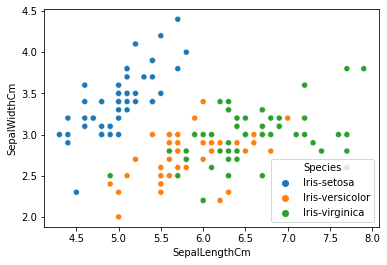

In [6]:
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species")
plt.show()

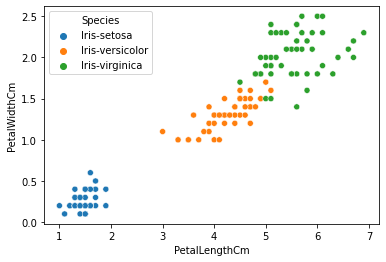

In [7]:
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species")
plt.show()

### 10. Use the IRIS data set to build a logistic regression model (using sklearn) and predict the class label ‘Species’. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y=df.Species
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=21)
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
model

LogisticRegression(max_iter=1000)

In [11]:
print(y_train.value_counts())
print(y_test.value_counts())

Iris-setosa        36
Iris-virginica     35
Iris-versicolor    34
Name: Species, dtype: int64
Iris-versicolor    16
Iris-virginica     15
Iris-setosa        14
Name: Species, dtype: int64


In [12]:
y_preds = model.predict(X_test)
y_preds[0:5]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [13]:
y_test.head()

92    Iris-versicolor
44        Iris-setosa
7         Iris-setosa
21        Iris-setosa
95    Iris-versicolor
Name: Species, dtype: object

## 11. Analysis and visualize the performance of the classifier using metrics, confusion matrix.

In [27]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_preds = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 13]], dtype=int64)

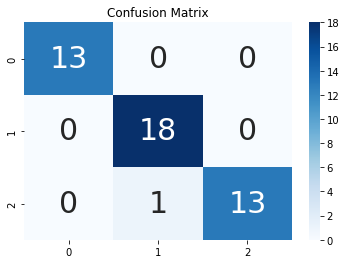

In [28]:
ax = plt.axes()
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [16]:
metrics.accuracy_score(y_test,y_preds)

0.9333333333333333

The Model classified 93% of the data correctly

### 12. Use the IRIS data and KNeighborsClassifier (using sklearn) and predict the class label ‘Species’ for k value between 2 and 20. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=20)

## 13.Identify the best k ( for k between 2 and 20) for the model built.

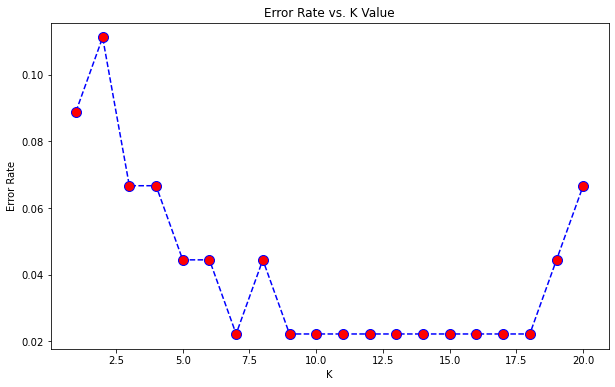

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np

k_range=range(1,21)
error_rate = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))

plt.plot(range(1,21),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

### 14. Comment  on  the  classifier  (Logistic  Regression  or KNeighborsClassifier)  that  has  a  better performance for the IRIS dataset.

 K = 9 to 18

In [31]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9777777777777777

KNN with k=9 gives an accuracy of 97.7% , where k is chosen by plotting the error vs k graph and chose value of k with least error.

The accuracy is very high because IRIS Dataset is a benchmark dataset

KNN Classfier has a bit better accuracy than Logistic Regression, but still both have high accuracies